In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('weatherHistory.csv')

# Display the data types of each column
print(df.dtypes)

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)        int64
Visibility (km)             float64
Loud Cover                    int64
Pressure (millibars)        float64
Daily Summary                object
dtype: object


In [7]:
import pandas as pd

# Load your dataset
df = pd.read_csv('weatherHistory.csv')

# Check the column names first
print(df.columns)

# Drop columns only if they exist
columns_to_drop = ['id', 'Unnamed: 0']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

# Get a statistical summary of the remaining data
summary = df.describe()
print(summary)

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')
       Temperature (C)  Apparent Temperature (C)      Humidity  \
count     96453.000000              96453.000000  96453.000000   
mean         11.932678                 10.855029      0.734899   
std           9.551546                 10.696847      0.195473   
min         -21.822222                -27.716667      0.000000   
25%           4.688889                  2.311111      0.600000   
50%          12.000000                 12.000000      0.780000   
75%          18.838889                 18.838889      0.890000   
max          39.905556                 39.344444      1.000000   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
count       96453.000000            96453.000000 

In [11]:
import pandas as pd

# Load the dataset
df = pd.read_csv('weatherHistory.csv')

# Count the number of occurrences for each unique precipitation type
precip_counts = df['Precip Type'].value_counts()

# Convert to DataFrame
precip_counts_df = precip_counts.to_frame()

# Display the DataFrame
print(precip_counts_df)


             count
Precip Type       
rain         85224
snow         10712


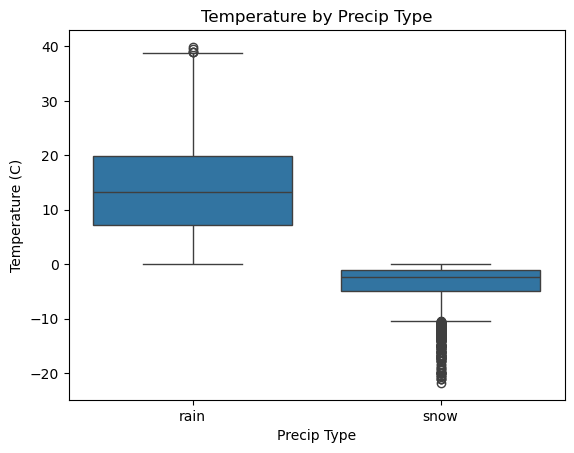

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('weatherHistory.csv')

sns.boxplot(x='Precip Type', y='Temperature (C)', data=df)
plt.title('Temperature by Precip Type')
plt.show()


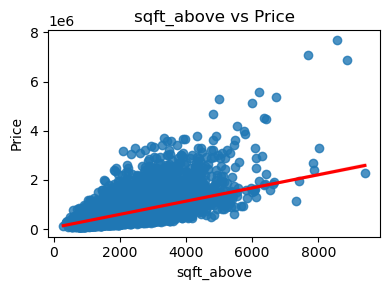

In [20]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("kc_house_data.csv")

# Smaller regplot
plt.figure(figsize=(4,3))   # smaller figure
sns.regplot(x="sqft_above", y="price", data=df, line_kws={"color":"red"})
plt.title("sqft_above vs Price")
plt.xlabel("sqft_above")
plt.ylabel("Price")
plt.tight_layout()

plt.show()

In [21]:
# Import libraries
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_csv("kc_house_data.csv")

# Select feature and target
X = df[['sqft_living']]
y = df['price']

# Fit linear regression model
lm = LinearRegression()
lm.fit(X, y)

# Calculate R^2
r2 = lm.score(X, y)
print("R^2:", r2)

R^2: 0.4928532179037931


In [22]:
# Import libraries
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_csv("kc_house_data.csv")

# List of features
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", 
            "view", "bathrooms", "sqft_living15", "sqft_above", 
            "grade", "sqft_living"]

# Select features and target
X = df[features]
y = df['price']

# Fit linear regression model
lm = LinearRegression()
lm.fit(X, y)

# Calculate R^2
r2 = lm.score(X, y)
print("R^2:", r2)

R^2: 0.6577151058279324


In [23]:
# Import libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

# Load dataset
df = pd.read_csv("kc_house_data.csv")

# List of features
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", 
            "view", "bathrooms", "sqft_living15", "sqft_above", 
            "grade", "sqft_living"]

# Select features and target
X = df[features]
y = df['price']

# Create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('linear', LinearRegression())
])

# Fit pipeline
pipeline.fit(X, y)

# Calculate R^2
r2 = pipeline.score(X, y)
print("R^2:", r2)


R^2: 0.7513467656307783


In [26]:
# Import necessary libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# Assume X_train, X_test, y_train, y_test are already defined

# Step 1: Apply second-order polynomial transformation
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Step 2: Create and fit Ridge regression with alpha=0.1
ridge = Ridge(alpha=0.1)
ridge.fit(X_train_poly, y_train)

# Step 3: Predict on test data
y_pred = ridge.predict(X_test_poly)

# Step 4: Calculate R^2 on test data
r2 = r2_score(y_test, y_pred)
print("R^2 on test data:", r2)

R^2 on test data: 0.7003486864342068
